In [5]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df["target"] = iris.target

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df["flower"] = df.target.apply( lambda x: iris.target_names[x])

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
df.shape

(150, 6)

In [15]:
df0 = df.iloc[0:50]
df1 = df.iloc[50:100]
df2 = df.iloc[100:150]


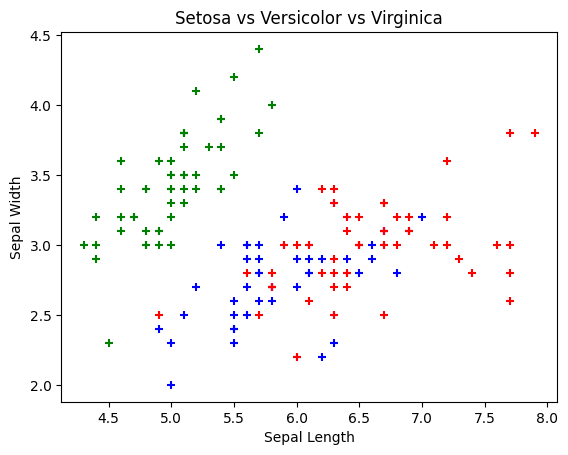

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Setosa vs Versicolor vs Virginica")
plt.scatter(df0["sepal length (cm)"], df0["sepal width (cm)"], color= "green", marker ="+")
plt.scatter(df1["sepal length (cm)"], df1["sepal width (cm)"], color= "blue", marker ="+")
plt.scatter(df2["sepal length (cm)"], df2["sepal width (cm)"], color= "red", marker ="+")

In [17]:
X = iris.data
y = iris.target

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
k_value = list(range(1,21))
cv_score = []
for k in k_value:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=5, scoring='accuracy')
    cv_score.append(scores.mean())

best_k = k_value[np.argmax(cv_score)]
print("Best K: ", best_k)

Best K:  6


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [25]:
len(X_train)

120

In [26]:
len(X_test)

30

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9666666666666667

In [30]:
from sklearn.metrics import confusion_matrix

y_predict = knn.predict(X_test)
cm = confusion_matrix(y_test,y_predict)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Text(50.722222222222214, 0.5, 'Truth')

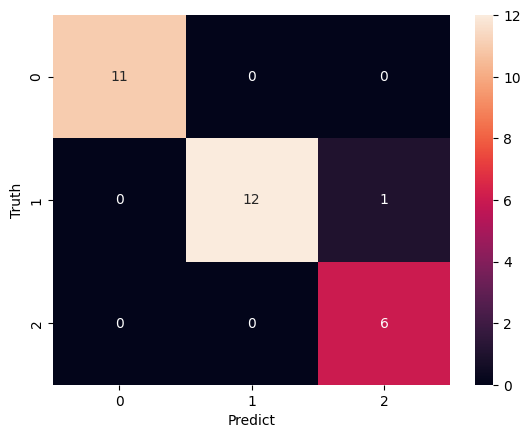

In [31]:
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel("Predict")
plt.ylabel("Truth")

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

